In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

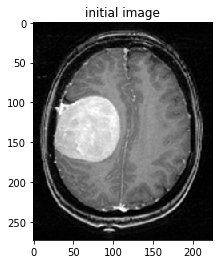

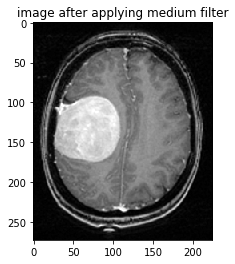

In [232]:
img_ini = cv2.imread('brain4.jpg') # read image
gray_img = cv2.cvtColor(img_ini,cv2.COLOR_BGR2GRAY) #convert image to gray
plt.imshow(gray_img,cmap='gray')
plt.title("initial image")
plt.show()
gray = cv2.medianBlur(gray_img,3) #apply median filter to smoothen image
cv2.imwrite("result/1/Median_filter.jpg",gray)
plt.imshow(img_ini,cmap="gray")
plt.title("image after applying medium filter")
plt.show()

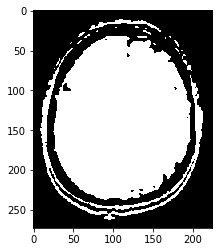

In [233]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU) #applying thresholding  to get the skull portion
cv2.imwrite("result/1/Threshold_img.jpg",thresh)
plt.imshow(thresh ,cmap='gray')
plt.show()

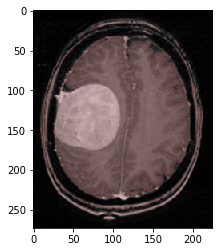

True

In [234]:
colormask = np.zeros(img_ini.shape, dtype=np.uint8)
colormask[thresh!=0] = np.array((0,0,255)) #overlaying mask over original image
blended = cv2.addWeighted(img_ini,0.7,colormask,0.1,0)
b,g,r = cv2.split(blended)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.show()
cv2.imwrite("result/1/blended_img.jpg",rgb_img)

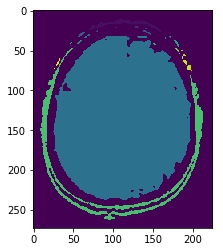

True

In [235]:
ret, markers = cv2.connectedComponents(thresh) #finding the connected components in the image
plt.imshow(markers)
plt.show()
cv2.imwrite("result/1/Connected_component_img.jpg",markers)

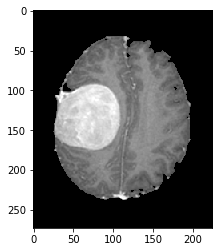

True

In [236]:

marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0] 

largest_component = np.argmax(marker_area)+1  #finding the largest one which will be the brain                    

brain_mask = markers==largest_component

brain_out = img_ini.copy()

brain_out[brain_mask==False] = (0,0,0) #filling rest of the background with black
plt.imshow(brain_out)
plt.show()
cv2.imwrite("result/1/brain.jpg",brain_out)

In [237]:
brain_out.shape

(273, 225, 3)

In [238]:
img = cv2.imread('result/1/brain.jpg',1)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
opening = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel)

In [239]:
cv2.imwrite('result/1/brain_erode_opening.jpg',opening)

True

In [240]:
import scipy as sp
import pylab as pl
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import KMeans
from skimage import io
from sklearn.cluster import MeanShift, estimate_bandwidth

In [241]:
im = io.imread('result/1/brain_erode_opening.jpg')

In [242]:
# Make the feature vectors
X = np.reshape(im, (im.shape[0]*im.shape[1], im.shape[2]))
bandwidth = estimate_bandwidth(X, quantile=0.4, n_samples=500)
# Perform Clustering
km = MeanShift(bandwidth=bandwidth, bin_seeding=True)
km.fit(X.astype(float)) # the .astype method is only to stop the .fit method
# from throwing a warning.
labels = np.reshape(km.labels_, im.shape[0:2])



In [243]:
# Plotting results
pl.figure()
pl.imshow(img_ini)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'contours'
  s)


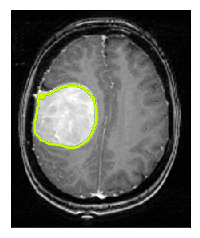

In [244]:
for l in range(N_clus):
    pl.contour(labels == 2, contours=1, \
               colors=[pl.cm.spectral(l / float(N_clus)), ])
pl.xticks(())
pl.yticks(())
pl.show()